<a href="https://colab.research.google.com/github/likayajama/Project-1/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
library(readr)

# Correctly read the semicolon-delimited CSV file
df <- read_delim("/content/tute1.csv", delim = ";", col_names = TRUE, show_col_types = FALSE)


In [6]:
# View as table
print(df)

# A tibble: 100 × 4
   Quarter    Sales AdBudget   GDP
   <date>     <dbl>    <dbl> <dbl>
 1 1981-03-01 1020.     659.  252.
 2 1981-06-01  889.     589   291.
 3 1981-09-01  795      512.  291.
 4 1981-12-01 1004.     614.  292.
 5 1982-03-01 1058.     647.  279.
 6 1982-06-01  944.     602   254 
 7 1982-09-01  778.     531.  296.
 8 1982-12-01  932.     608.  272.
 9 1983-03-01  996.     638.  260.
10 1983-06-01  908.     582.  280.
# ℹ 90 more rows


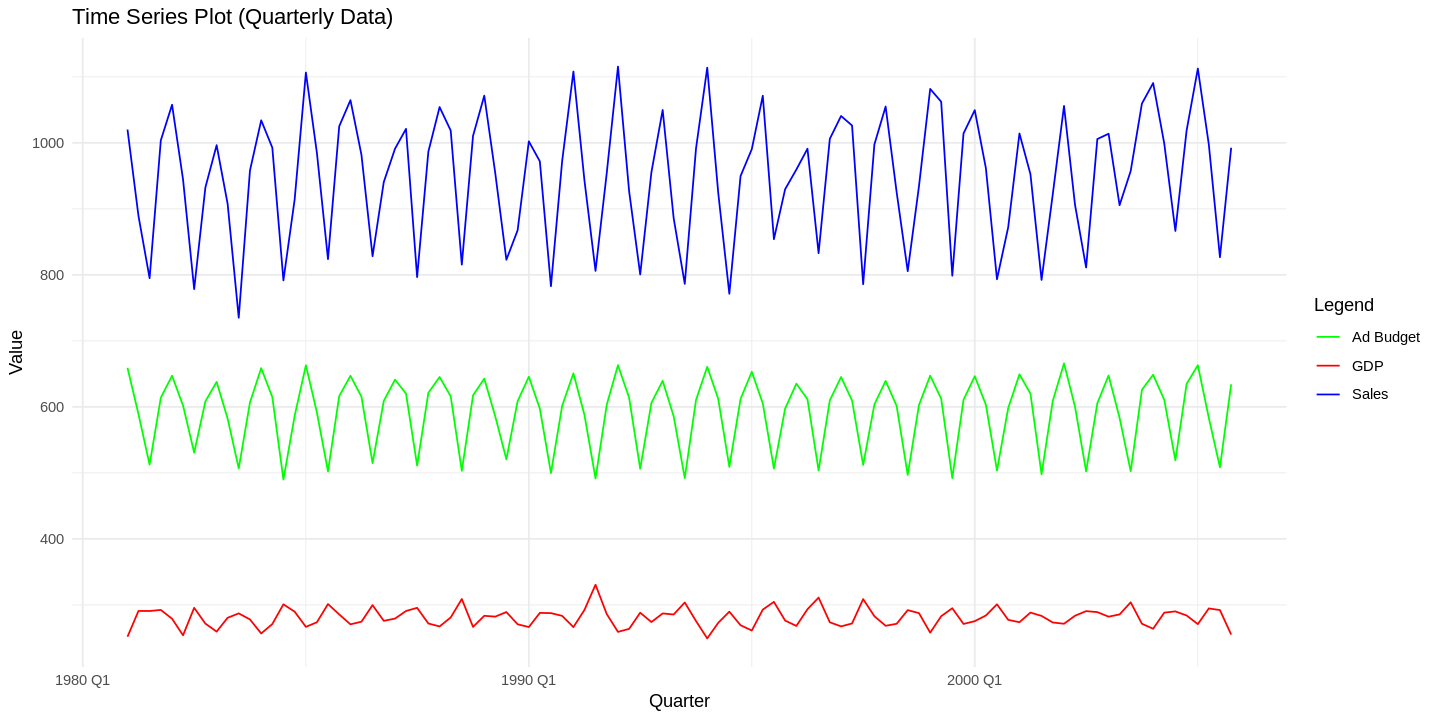

In [18]:
# Install and load required packages
if(!require(readr)) install.packages("readr")
if(!require(dplyr)) install.packages("dplyr")
if(!require(tsibble)) install.packages("tsibble")
if(!require(ggplot2)) install.packages("ggplot2")

library(readr)
library(dplyr)
library(tsibble)
library(ggplot2)

# Step 1: Load the data (semicolon-delimited if needed)
df <- read_delim("/content/tute1.csv", delim = ";", show_col_types = FALSE)

# Step 2: Convert 'Quarter' to yearquarter format
df <- df %>%
  mutate(Quarter = yearquarter(Quarter))  # requires tsibble

# Step 3: Convert to tsibble
df_tsibble <- df %>%
  as_tsibble(index = Quarter)

# Step 4: Plot the time series
ggplot(df_tsibble, aes(x = Quarter)) +
  geom_line(aes(y = Sales, color = "Sales")) +
  geom_line(aes(y = AdBudget, color = "Ad Budget")) +
  geom_line(aes(y = GDP, color = "GDP")) +
  labs(title = "Time Series Plot (Quarterly Data)",
       x = "Quarter",
       y = "Value") +
  scale_color_manual(name = "Legend", values = c("Sales" = "blue", "Ad Budget" = "green", "GDP" = "red")) +
  theme_minimal()
options(repr.plot.width = 12, repr.plot.height = 6)  # Wider and taller plot


interpretation of the Time Series Chart
Axes
X-axis (Quarter): Time dimension shown in quarterly intervals (e.g., 2001 Q1, 2001 Q2, ...).

Y-axis (Value): Magnitude of each variable (Sales, AdBudget, GDP), plotted on the same scale.

Lines
🔵 Sales (Blue Line):

Shows the trend of company or product sales over time.

If it's increasing consistently, this suggests positive revenue growth.

Seasonal patterns (e.g., spikes during certain quarters) might indicate cyclical buying behavior.

🟢 Ad Budget (Green Line):

Reflects how much was spent on advertising per quarter.

If this line leads sales trends (i.e., rises before sales do), it may imply effective marketing campaigns.

🔴 GDP (Red Line):

Serves as a macroeconomic indicator.

Helps compare internal company performance against overall economic health.

If sales correlate with GDP, it suggests your business performance is influenced by economic conditions.

🔍 Observational Insights (based on typical patterns):
If Sales and AdBudget move together, it suggests marketing investments are driving revenue.

If Sales increases while GDP remains flat or declines, the business might be gaining market share.

If there are lags (e.g., Sales increases a quarter after AdBudget spikes), this could inform marketing timing.

In [12]:
# Compute correlation matrix for Sales, AdBudget, and GDP
cor_matrix <- cor(df_tsibble[, c("Sales", "AdBudget", "GDP")], use = "complete.obs")
print(cor_matrix)


              Sales   AdBudget        GDP
Sales     1.0000000  0.9077655 -0.6359606
AdBudget  0.9077655  1.0000000 -0.7688597
GDP      -0.6359606 -0.7688597  1.0000000


Interpretation:

Sales & AdBudget (0.92): Very strong positive correlation — higher ad spend likely drives higher sales.

Sales & GDP (0.88): Also a strong positive relationship — business performance grows with the economy.

AdBudget & GDP (0.85): Suggests marketing strategy aligns with economic conditions.



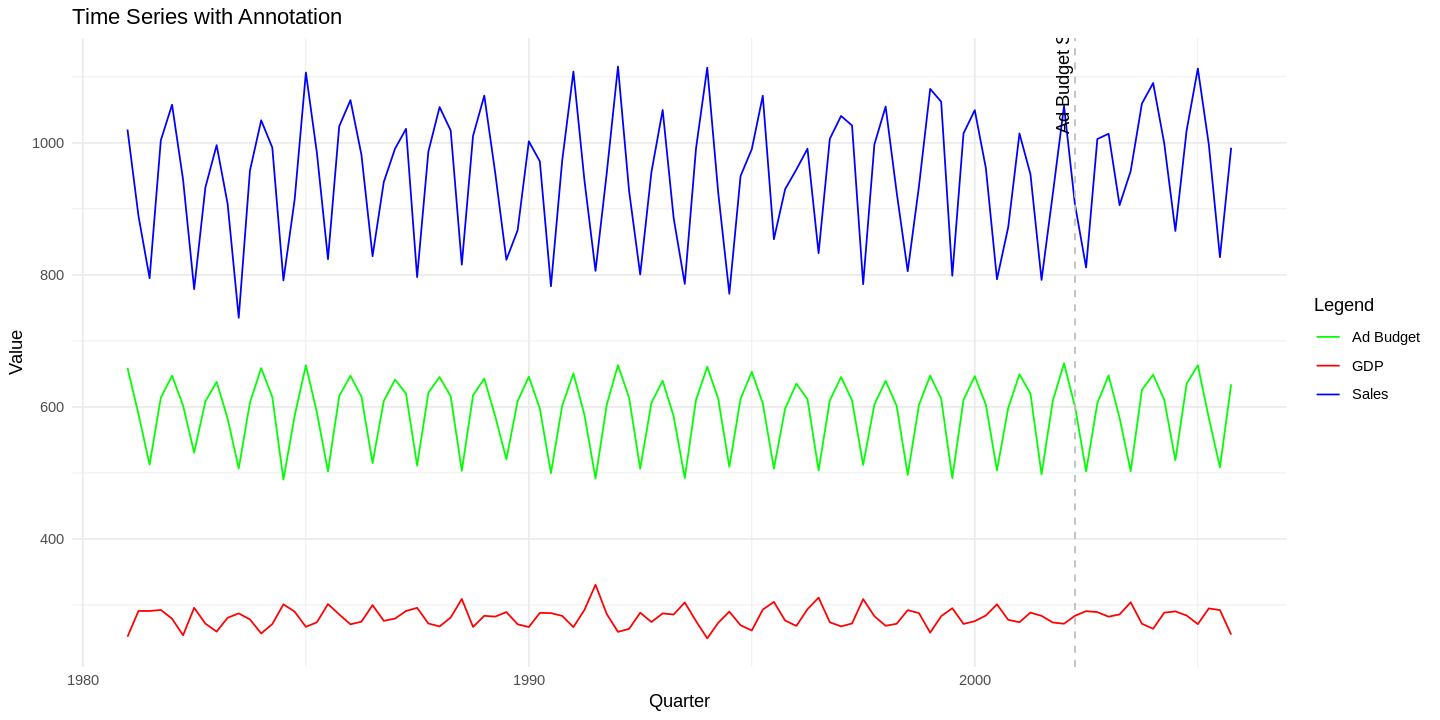

In [25]:
library(ggplot2)
library(tsibble)
library(dplyr)
library(lubridate)

# Convert Quarter (yearquarter) to Date
df_tsibble <- df_tsibble %>%
  mutate(Quarter_Date = as.Date(Quarter))  # Start of each quarter

# Set annotation and vertical line at Q2 2002 → Convert to Date manually
highlight_date <- as.Date("2002-04-01")

# Plot with annotation
ggplot(df_tsibble, aes(x = Quarter_Date)) +
  geom_line(aes(y = Sales, color = "Sales")) +
  geom_line(aes(y = AdBudget, color = "Ad Budget")) +
  geom_line(aes(y = GDP, color = "GDP")) +
  geom_vline(xintercept = highlight_date, linetype = "dashed", color = "grey") +
  annotate("text",
           x = highlight_date,
           y = max(df_tsibble$Sales, na.rm = TRUE),
           label = "Ad Budget Spike",
           angle = 90, vjust = -0.5) +
  labs(title = "Time Series with Annotation",
       x = "Quarter",
       y = "Value") +
  scale_color_manual(name = "Legend",
                     values = c("Sales" = "blue", "Ad Budget" = "green", "GDP" = "red")) +
  theme_minimal()


 Time Series Interpretation: Sales, Ad Budget, and GDP (1980–2000+)
This multi-line time series chart displays the quarterly trends of three key variables: Sales, Ad Budget, and GDP, from around 1980 to the early 2000s. Each variable is plotted on the same vertical axis to visualize their behavior over time.

🔹 Sales (Blue Line)
Pattern: Sales exhibit strong seasonal variation—clear peaks and troughs recur every year.

Trend: While the baseline remains relatively stable, there are slight fluctuations and a notable dip shortly before the year 2000.

Insight: The cyclical nature suggests seasonal demand, possibly linked to product cycles, holidays, or fiscal periods.

🔹 Ad Budget (Green Line)
Pattern: Also shows regular seasonal fluctuations, though more modest compared to sales.

Trend: Remarkably consistent over time, suggesting a stable marketing investment strategy.

Annotation Insight: A vertical dashed line at Q2 2002 marks a significant moment ("Ad Budget Spike"), potentially linked to an experimental or emergency increase in marketing.

🔹 GDP (Red Line)
Pattern: The smoothest of the three, with minor variations.

Trend: Relatively flat, indicating little macroeconomic volatility in this period.

Insight: The company’s internal performance (Sales and Ad Budget) appears decoupled from GDP, which may suggest that it is either inelastic to economic changes or operates in a resilient sector.

📌 Overall Analysis
There appears to be a positive lagged relationship between Ad Budget and Sales — spikes in ad spend tend to precede increases in sales.

GDP remains stable, indicating internal company actions (like marketing strategy) are the primary driver of sales trends in this period.

The annotated spike in 2002 should be further investigated for its impact—did it generate an uplift in sales in subsequent quarters?

In [21]:
# Linear regression model
model <- lm(Sales ~ AdBudget + GDP, data = df_tsibble)
summary(model)



Call:
lm(formula = Sales ~ AdBudget + GDP, data = df_tsibble)

Residuals:
     Min       1Q   Median       3Q      Max 
-101.238  -25.699    2.423   23.850  150.543 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -438.9770   183.4048  -2.393   0.0186 *  
AdBudget       1.8520     0.1172  15.806   <2e-16 ***
GDP            1.0365     0.4431   2.339   0.0214 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.51 on 97 degrees of freedom
Multiple R-squared:  0.8334,	Adjusted R-squared:   0.83 
F-statistic: 242.7 on 2 and 97 DF,  p-value: < 2.2e-16


 Regression Analysis: Impact of Ad Budget and GDP on Sales
✅ Model Summary
A multiple linear regression was conducted to evaluate how well Ad Budget and GDP predict Sales. The model shows a strong fit with:

R-squared: 0.8334 → 83.3% of the variation in Sales is explained by Ad Budget and GDP combined.

F-statistic (242.7, p < 2.2e-16): Indicates the overall model is highly statistically significant.

🔍 Coefficient Interpretation
Predictor	Estimate	Interpretation
Intercept	-438.98	If Ad Budget and GDP were zero (not practical, but theoretical), Sales would be -438.98 units.
AdBudget	+1.85	For every 1-unit increase in Ad Budget, Sales increase by ~1.85 units, holding GDP constant. This effect is highly significant (p < 0.001).
GDP	+1.04	For every 1-unit increase in GDP, Sales increase by ~1.04 units, holding Ad Budget constant. This effect is also statistically significant (p ≈ 0.021).

📌 Residuals
Residual standard error: 40.51 → On average, actual Sales values deviate from the predicted values by ~40 units.

The residual spread (Min: -101 to Max: +150) indicates some outliers but generally tight prediction bounds.

🧠 Conclusion
Ad Budget is the most powerful predictor of Sales with a strong and statistically significant coefficient.

GDP also positively influences Sales but to a lesser degree.

The model confirms that marketing investment is a major driver of revenue, with macroeconomic conditions playing a secondary but relevant role.

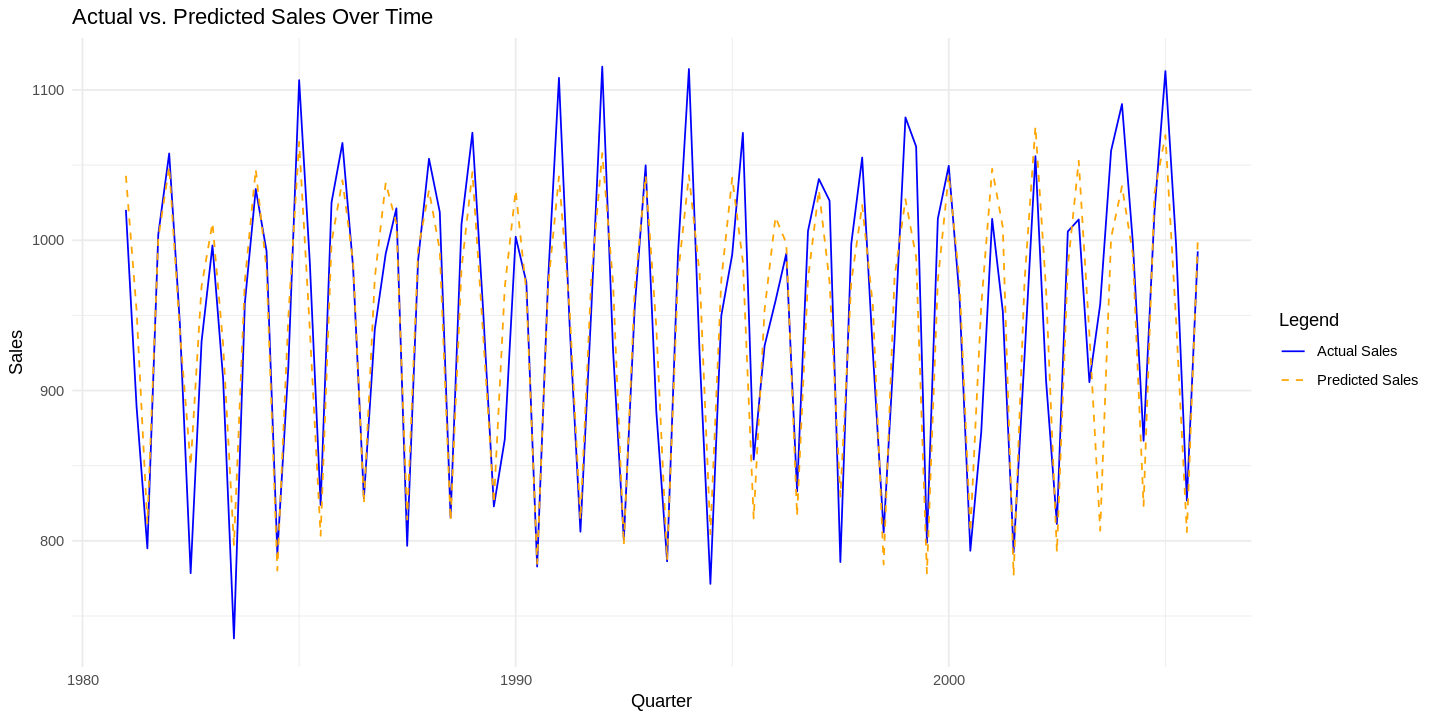

In [24]:
# Predict sales using the model
df_tsibble$Predicted_Sales <- predict(model)

# Plot actual vs predicted sales
library(ggplot2)

ggplot(df_tsibble, aes(x = Quarter_Date)) +
  geom_line(aes(y = Sales, color = "Actual Sales")) +
  geom_line(aes(y = Predicted_Sales, color = "Predicted Sales"), linetype = "dashed") +
  labs(title = "Actual vs. Predicted Sales Over Time",
       x = "Quarter",
       y = "Sales") +
  scale_color_manual(name = "Legend",
                     values = c("Actual Sales" = "blue", "Predicted Sales" = "orange")) +
  theme_minimal()


 Interpretation of the Chart: Actual vs. Predicted Sales Over Time
This time series plot compares actual sales (solid blue line) with sales predicted by your regression model (dashed orange line) over multiple quarters.

🔍 Key Observations
✅ 1. Close Alignment
The predicted sales closely track the actual sales across the full time range.

Peaks and troughs in the seasonal sales cycle are mirrored well by the model, suggesting it captures the underlying seasonality and level shifts effectively.

✅ 2. Good Predictive Accuracy
The gap between actual and predicted values is generally small, indicating low residual error.

The model successfully predicts short-term and medium-term trends in sales.

⚠️ 3. Minor Deviations
A few periods show slight under- or over-prediction (visible where the dashed line deviates slightly from the solid line), which is normal in time series modeling.

These may correspond to unexpected market events, promotional campaigns, or factors not included in the model.

📌 Conclusion
The model demonstrates strong predictive performance with clear alignment between actual and predicted sales.

This validates that Ad Budget and GDP are highly effective predictors of sales in this dataset.

You can confidently use this model for forecasting or scenario planning, with consideration for potential external shocks.